<a href="https://colab.research.google.com/github/TJConnellyContingentMacro/TimeSeriesAnalysis/blob/master/FamaFrenchModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# DATA INGEST

## Read Stock Price Data and Limit to 4 stocks

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/TJConnellyContingentMacro/TimeSeries/master/Stock_FX_Bond_2004_to_2005.csv', index_col= 0 )
df.index = pd.to_datetime(df.index)
df = df[['GM_AC', 'F_AC', 'UTX_AC', 'MRK_AC']].copy()

df = np.log(df).diff()*100
df = df.dropna()
df

,GM_AC,F_AC,UTX_AC,MRK_AC
Date,,,,
2004-01-05,1.760945,3.179165,0.596489,1.991531
2004-01-06,-0.611752,-0.333445,-0.242585,-0.470589
2004-01-07,1.365998,2.701977,0.308642,0.117855
2004-01-08,-0.020875,0.648090,-0.110120,0.516918
2004-01-09,-2.173769,-3.216556,-1.442706,-1.988231
...,...,...,...,...
2005-12-23,1.044252,-0.652318,-1.002382,0.578780
2005-12-27,0.816776,-0.130976,-0.923302,-0.804769
2005-12-28,-2.026911,-0.525625,0.213828,-0.097009


## Now Get Fama-French Factors and Limit to 2004-2005

In [33]:
ff = pd.read_csv('https://raw.githubusercontent.com/TJConnellyContingentMacro/TimeSeries/master/FamaFrench0405.csv',index_col='date')

ff.drop(columns='Unnamed: 0', axis = 1, inplace = True)
ff.index = pd.to_datetime(ff.index, format = '%Y%m%d')

ff

,Mkt.RF,SMB,HML,RF
date,,,,
2004-01-05,1.22,0.34,0.02,0.004
2004-01-06,0.19,0.13,0.18,0.004
2004-01-07,0.27,0.50,-0.08,0.004
2004-01-08,0.48,0.32,0.61,0.004
2004-01-09,-0.63,0.01,0.29,0.004
...,...,...,...,...
2005-12-23,0.08,0.27,0.00,0.015
2005-12-27,-1.00,-0.39,0.11,0.015
2005-12-28,0.27,0.36,0.13,0.015


## Merge Them together and take risk-free return from log stock returns

In [0]:
df = pd.merge(df, ff, how = 'inner', left_index=True, right_index = True)

In [0]:
df['GM_AC'] = df['GM_AC'] - df['RF']
df['F_AC'] = df['F_AC'] - df['RF']
df['UTX_AC'] = df['UTX_AC'] - df['RF']
df['MRK_AC'] = df['MRK_AC'] - df['RF']

In [36]:
df

,GM_AC,F_AC,UTX_AC,MRK_AC,Mkt.RF,SMB,HML,RF
Date,,,,,,,,
2004-01-05,1.756945,3.175165,0.592489,1.987531,1.22,0.34,0.02,0.004
2004-01-06,-0.615752,-0.337445,-0.246585,-0.474589,0.19,0.13,0.18,0.004
2004-01-07,1.361998,2.697977,0.304642,0.113855,0.27,0.50,-0.08,0.004
2004-01-08,-0.024875,0.644090,-0.114120,0.512918,0.48,0.32,0.61,0.004
2004-01-09,-2.177769,-3.220556,-1.446706,-1.992231,-0.63,0.01,0.29,0.004
...,...,...,...,...,...,...,...,...
2005-12-23,1.029252,-0.667318,-1.017382,0.563780,0.08,0.27,0.00,0.015
2005-12-27,0.801776,-0.145976,-0.938302,-0.819769,-1.00,-0.39,0.11,0.015
2005-12-28,-2.041911,-0.540625,0.198828,-0.112009,0.27,0.36,0.13,0.015


# MODELING

## OLS model for GM

In [37]:
X = df[['Mkt.RF', 'SMB', 'HML']]
y = df['GM_AC']
GMmodel = sm.OLS(y, X).fit()
GMmodel.summary()
   


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  GM_AC   R-squared (uncentered):                   0.166
Model:                            OLS   Adj. R-squared (uncentered):              0.161
Method:                 Least Squares   F-statistic:                              33.16
Date:                Sat, 23 Nov 2019   Prob (F-statistic):                    1.46e-19
Time:                        03:43:54   Log-Likelihood:                         -1045.8
No. Observations:                 503   AIC:                                      2098.
Df Residuals:                     500   BIC:                                      2110.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt.RF         1.3640      0.153      8.942      0.000       1.064       1.664
SMB           -0.2461      0.225     -1.092      0.275      -0.689       0.197
HML            0.5235      0.265      1.976      0.049       0.003       1.044
==============================================================================
Omnibus:                      121.871   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4255.119
Skew:                           0.128   Prob(JB):                         0.00
Kurtosis:                      17.246   Cond. No.                         2.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS model for Ford

In [38]:
X = df[['Mkt.RF', 'SMB', 'HML']]
y = df['F_AC']
Fmodel = sm.OLS(y, X).fit()
Fmodel.summary()
   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   F_AC   R-squared (uncentered):                   0.257
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              57.51
Date:                Sat, 23 Nov 2019   Prob (F-statistic):                    5.92e-32
Time:                        03:43:54   Log-Likelihood:                         -923.99
No. Observations:                 503   AIC:                                      1854.
Df Residuals:                     500   BIC:                                      1867.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt.RF         1.3318      0.120     11.124      0.000       1.097       1.567
SMB           -0.0123      0.177     -0.070      0.945      -0.360       0.335
HML            0.2814      0.208      1.353      0.177      -0.127       0.690
==============================================================================
Omnibus:                       75.118   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.501
Skew:                           0.518   Prob(JB):                     1.18e-84
Kurtosis:                       7.168   Cond. No.                         2.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Thoughts on results
these were coming close to what I had in R but were off slightly -- ie. Ford's HML coefficient was 0.34 in R, here it was 0.28.   Overall R-square was 0.264 in R, 0.257 here.

## OLS model for UTX

In [39]:
X = df[['Mkt.RF', 'SMB', 'HML']]
y = df['UTX_AC']
UTXmodel = sm.OLS(y, X).fit()
print(UTXmodel.summary())
   

                                 OLS Regression Results                                
Dep. Variable:                 UTX_AC   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.348
Method:                 Least Squares   F-statistic:                              90.59
Date:                Sat, 23 Nov 2019   Prob (F-statistic):                    7.89e-47
Time:                        03:43:54   Log-Likelihood:                         -638.34
No. Observations:                 503   AIC:                                      1283.
Df Residuals:                     500   BIC:                                      1295.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Test/Train Split for UTX

In [0]:
trainX = df[['Mkt.RF', 'SMB', 'HML']][0:250]
trainy = df['UTX_AC'][0:250]
testX = df[['Mkt.RF', 'SMB', 'HML']][250:]
testy = df['UTX_AC'][250:]

### fit model to training data

In [0]:
UTX_train_model = sm.OLS(trainy, trainX).fit()

#### In-sample prediction

In [0]:
ypred = UTX_train_model.predict(testX)

#### out-of sample prediction

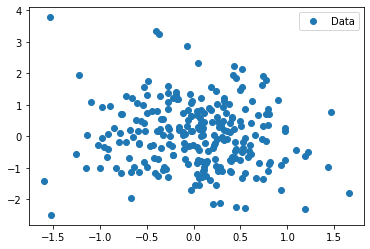

In [61]:
fig, ax = plt.subplots()
ax.plot(ypred.shift(-1), testy, 'o', label="Data")
#ax.plot(x1, y_true, 'b-', label="True")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

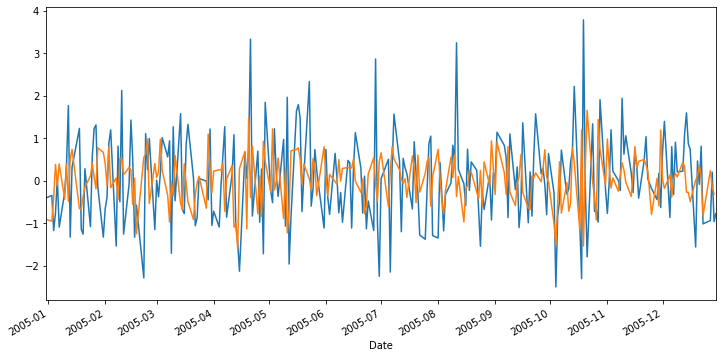

In [62]:
testy.plot()
ypred.shift(-1).plot(figsize=(12,6));

Looking at difference of prediction vs. actual

In [0]:
Diff = ypred.shift(-1) - testy

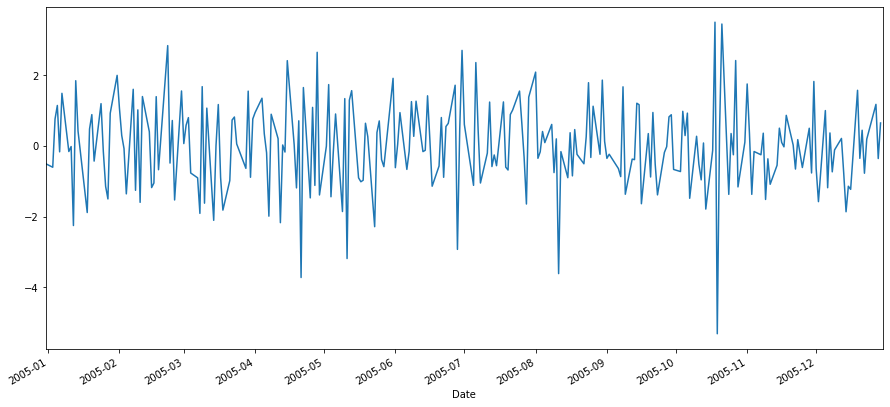

In [64]:
Diff.plot(figsize = (15,7))

In [0]:
df1 = pd.DataFrame()
df1['Actual Test Value'] = testy
df1['predicted'] = ypred.shift(-1)

In [59]:
downs = df1.loc[(df1['Actual Test Value'] < 0) & (df1['predicted'] < 0)]
ups = df1.loc[(df1['Actual Test Value'] > 0) & (df1['predicted'] > 0)]
PCT_DIRECTION_CORRECT  = (len(ups) + len(downs)) / len(df1)
print ('Perrcent of periods the 3-factor Fama-French Model got the direction of the trade correct: ')
print(f'{PCT_DIRECTION_CORRECT:.2%}')


Perrcent of periods the 3-factor Fama-French Model got the direction of the trade correct: 
43.87%
